In [61]:
import torch
from torch import nn

import cloudpickle

import matplotlib.pyplot as plt
from ipywidgets import interact

import numpy as np
import os

In [62]:
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['font.size'] = 16
plt.rcParams['savefig.bbox'] = 'standard'#'tight'
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

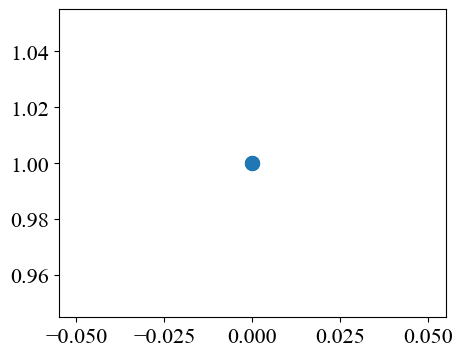

In [63]:
plt.plot([0, 0], [1, 1], 'o-')

In [64]:
simulation_dir = 'spmNonParam2DFullODE_scale_20230724111627/reSimulate_20230808142159'#'spmSimulate_20240122110123' # the directory where the simulation results are stored
dataName = 'Spring_ODE' #'Spring_SDE' # the name of the data file

In [65]:
x = torch.load(os.path.join(simulation_dir, dataName+'_traj.pt'))
print(x.shape)
print(x)

torch.Size([51, 30, 100, 4])
tensor([[[[ 1.5469e+00,  4.1634e+00,  9.0916e-04,  5.1002e-04],
          [ 3.9046e+00,  2.1545e+00,  1.7417e-05,  2.8673e-05],
          [ 2.2570e+00,  4.2674e+00,  8.3753e-04, -3.3322e-04],
          ...,
          [ 9.4840e-01,  2.3746e+00,  5.6684e-04, -5.0038e-04],
          [ 3.4536e+00,  1.3120e+00,  7.3361e-04,  3.4002e-04],
          [ 1.0334e+00,  9.9834e-01, -9.5199e-04, -9.4814e-04]],

         [[ 4.2696e+00,  2.5779e+00, -9.1662e-04, -6.3159e-04],
          [ 2.0240e+00,  3.2106e-01,  3.0300e-04,  2.5094e-05],
          [ 1.2567e+00,  1.6788e+00, -5.3968e-04, -7.0842e-04],
          ...,
          [ 1.2649e-01,  2.8057e+00, -8.4720e-04, -4.2472e-04],
          [ 2.7471e+00,  3.0792e+00, -9.1846e-04, -7.9704e-04],
          [ 3.9465e-01,  3.4214e+00, -4.4824e-05,  1.4181e-04]],

         [[ 1.8851e+00,  3.4710e+00,  8.5671e-04, -1.6209e-04],
          [ 1.1651e+00,  7.4473e-01, -3.7385e-04,  2.0937e-04],
          [ 2.7018e+00,  1.1610e+00, -8.0

In [66]:
ts = torch.load(os.path.join(simulation_dir, dataName+'_t_eval.pt'))
print(ts)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50.])


In [67]:
N_batch = x.shape[1]
N_t = x.shape[0]

In [68]:
L = 5 # the size of the domain to plot

@interact(n=(0, N_batch-1), t = (0, N_t-1))
def f(n, t):
    fig, ax = plt.subplots()
    ax.plot(x[t, n, :, 0], x[t, n, :, 1], 'o')
    ax.quiver(x[t, n, :, 0], x[t, n, :, 1], x[t, n, :, 2], x[t, n, :, 3])
    ax.grid(True)
    ax.set_aspect('equal')
    xy_mean = torch.mean(x[t, n, :, 0:2], dim=0)
    ax.set_xlim([xy_mean[0]-2.5, xy_mean[0]+2.5])#[0, L])#
    ax.set_ylim([xy_mean[1]-2.5, xy_mean[1]+2.5])#[0, L])#
    plt.show()

interactive(children=(IntSlider(value=14, description='n', max=29), IntSlider(value=25, description='t', max=5…

In [69]:
def plot_partcles(n, t, flg_track=False):
    fig, ax = plt.subplots()
    ax.plot(x[t, n, :, 0], x[t, n, :, 1], 'o')
    ax.quiver(x[t, n, :, 0], x[t, n, :, 1], x[t, n, :, 2], x[t, n, :, 3])
    ax.grid(True)
    ax.set_xticks(np.arange(0, L+1, 1))
    ax.set_yticks(np.arange(0, L+1, 1))
    ax.set_aspect('equal')
    xy_mean = torch.mean(x[t, n, :, 0:2], dim=0)
    if flg_track:
        ax.set_xlim([xy_mean[0]-2.5, xy_mean[0]+2.5])
        ax.set_ylim([xy_mean[1]-2.5, xy_mean[1]+2.5])
    else:
        ax.set_xlim([0, L])
        ax.set_ylim([0, L])
    #ax.set_xlabel(r'$x$')
    #ax.set_ylabel(r'$y$')
    ax.set_title(r'$t = ${:.1f}'.format(ts[t]))
    return fig, ax

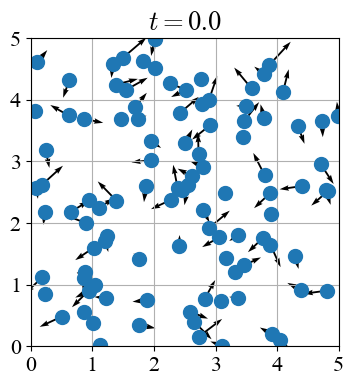

In [70]:
fig, ax = plot_partcles(0, 0)

In [71]:
n_batch = 0 # the batch number to plot
flg_track = False # whether to track the center of particles or not

savefig_dir = os.path.join(simulation_dir, 'batch'+str(n_batch))
os.makedirs(savefig_dir, exist_ok=True)

for t in range(12):
    fig, ax = plot_partcles(n_batch, t, flg_track)
    fig.savefig(os.path.join(savefig_dir, 't{:03}.svg'.format(t)))
    plt.clf()
    plt.close()

In [72]:
#n_batch = 0
#flg_track = False

#savefig_dir = os.path.join(simulation_dir, 'batch'+str(n_batch))
#os.makedirs(savefig_dir, exist_ok=True)

for t in range(N_t):
    fig, ax = plot_partcles(n_batch, t, flg_track)
    #ax.set_xlabel(r'$x$')
    #ax.set_ylabel(r'$y$')
    fig.savefig(os.path.join(savefig_dir, 't{:03}'.format(t)))
    plt.clf()
    plt.close()